## False Coloring Introduction 


#### Purpose
Render grayscale digital pathology datasets into virtual H&E color space for 3D pathology. This notebook is used to describe some of the main features of the FalseColor python package, and view the results. The main processing application of this package is color_script.py located in the scripts folder. 

#### Using this notebook

##### GPU processing
NOTE: for using the non-flat field based fc.rapidFalseColor method additional background subtraction is unneeded.
1. Background levels are calculated and subtracted from both channels and image levels are clipped to the range of 0-65535.
2. Edges are enhanced using the sharpenImage method in Color.py
3. The flat field for each channel is calculated and resized 
4. The images are false colored using the rapidFalseColor method from Color.py

In [1]:
import FalseColor.Color as fc
from FalseColor.FCdataobject import DataObject
import numpy as np
import os
%matplotlib notebook
import matplotlib.pyplot as plt
from FalseColor.Process import ViewImage
import h5py as h5
import scipy.ndimage as nd
import skimage as sk
import cv2
import copy

In [2]:
#load data in ./h5_sample_data/example_data.h5
file_path = os.path.join(os.getcwd(),'h5_sample_data/prostate/data.h5')

with h5.File(file_path,'r') as f:
    nuclei = f['t00000/s00/0/cells'][:]
    cyto = f['t00000/s01/0/cells'][:]
f.close()

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x255d6f7eac8>)

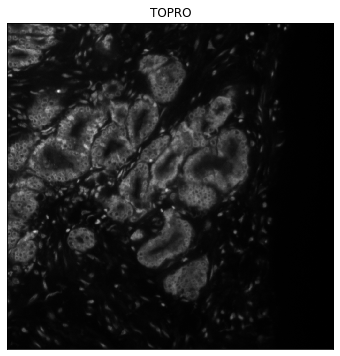

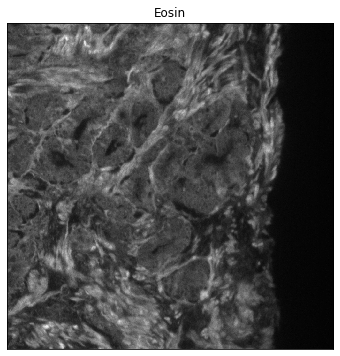

In [3]:
#View Raw Data from nuclear/cytoplasmic channels
ViewImage(nuclei[0], figsize = (6,6), cmap = 'gray', title = 'TOPRO')
ViewImage(cyto[0], figsize = (6,6), cmap = 'gray', title = 'Eosin')

In [4]:
#grab RGB settings for both channels using fc.getDefaultRGBSettings()

settings_dict = fc.getDefaultRGBSettings(use_default = False)
nuclei_RGBsettings = settings_dict['nuclei']
cyto_RGBsettings = settings_dict['cyto']

In [5]:
#Sharpen images using fc.sharpenImage()

sharp_nuclei = fc.sharpenImage(nuclei[0])
sharp_cyto = fc.sharpenImage(cyto[0])

In [6]:
pseudo_prostate = fc.rapidFalseColor(sharp_nuclei, sharp_cyto,nuclei_RGBsettings, cyto_RGBsettings)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x255d7174688>)

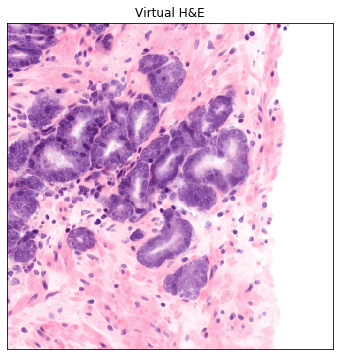

In [7]:
ViewImage(pseudo_prostate, figsize = (6,6), title = 'Virtual H&E')